In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import fastai

import torch
from fastai.data.all import to_np

In [3]:
time =torch.arange(0,20.0,1.0)

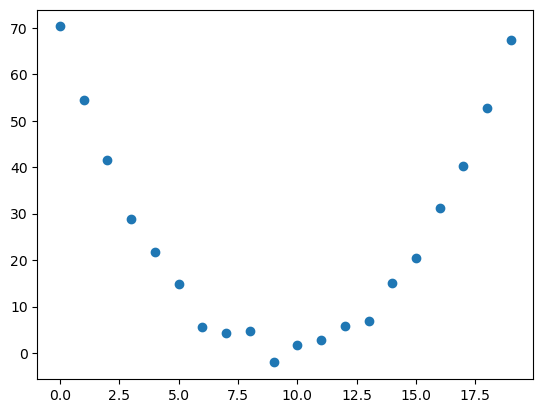

In [4]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed)

In [33]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + b*t + c

def mse(preds, targets): 
    return ((preds-targets)**2).mean()

def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

In [34]:
params = torch.randn(3).requires_grad_()
orig_params = params.clone()
preds = f(time, params)
preds

tensor([-2.7847e-01,  2.2626e+00,  7.3264e+00,  1.4913e+01,  2.5023e+01,
         3.7655e+01,  5.2810e+01,  7.0488e+01,  9.0689e+01,  1.1341e+02,
         1.3866e+02,  1.6643e+02,  1.9672e+02,  2.2954e+02,  2.6487e+02,
         3.0273e+02,  3.4312e+02,  3.8602e+02,  4.3145e+02,  4.7940e+02],
       grad_fn=<AddBackward0>)

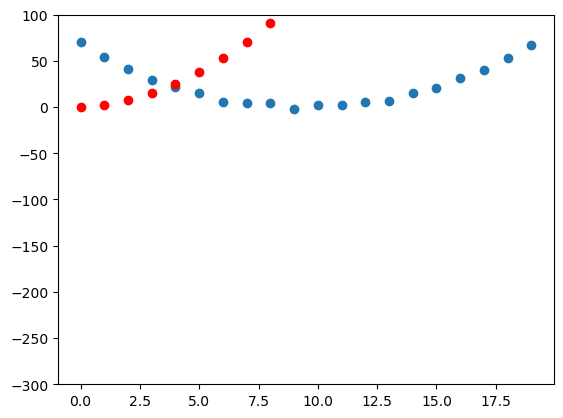

In [35]:
show_preds(preds)

In [36]:
loss = mse(preds, speed)
loss

tensor(42029.9141, grad_fn=<MeanBackward0>)

In [37]:
loss.backward()
params.grad

tensor([68242.4297,  4403.6450,   286.4278])

In [38]:
params

tensor([ 1.2614,  1.2796, -0.2785], requires_grad=True)

In [39]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [40]:
preds = f(time,params)
mse(preds, speed)

tensor(8475.8594, grad_fn=<MeanBackward0>)

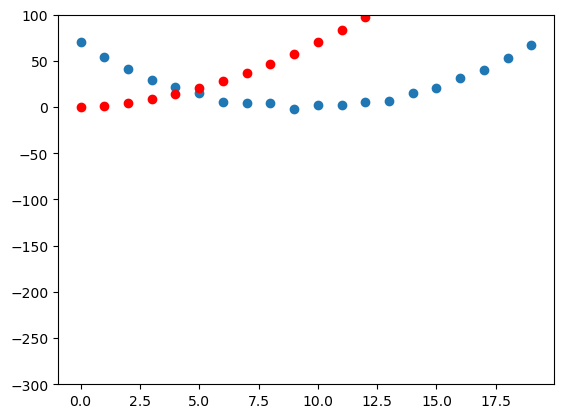

In [41]:
show_preds(preds)